In [3]:
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
cc = pd.read_csv('/content/covid_19_clean_complete.csv',parse_dates=['Date'])
cc.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

dc_confirmed = pd.read_csv("/content/time_series_covid19_confirmed_global.csv")
dr_recovered = pd.read_csv("/content/time_series_covid19_recovered_global.csv")
dd_deaths = pd.read_csv("/content/time_series_covid19_deaths_global.csv")

dc_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
dr_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
dd_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [15]:
dd_deaths.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,6,8,12,14,15,16,17,18
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2


In [16]:
cc.head()

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [17]:
cc2 = cc.groupby(["Date", "Country", "Province/State"])[['Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
cc2.head()

,Date,Country,Province/State,Confirmed,Deaths,Recovered
0,2020-01-22,Australia,Australian Capital Territory,0,0,0
1,2020-01-22,Australia,New South Wales,0,0,0
2,2020-01-22,Australia,Northern Territory,0,0,0
3,2020-01-22,Australia,Queensland,0,0,0
4,2020-01-22,Australia,South Australia,0,0,0


In [18]:
cc.groupby('Date').sum().head()

,Lat,Long,Confirmed,Deaths,Recovered
Date,,,,,
2020-01-22,5599.85653,5865.544292,555,17,28
2020-01-23,5599.85653,5865.544292,654,18,30
2020-01-24,5599.85653,5865.544292,941,26,36
2020-01-25,5599.85653,5865.544292,1434,42,39
2020-01-26,5599.85653,5865.544292,2118,56,52


In [0]:
confirmed = cc.groupby('Date').sum()['Confirmed'].reset_index()
deaths = cc.groupby('Date').sum()['Deaths'].reset_index()
recovered = cc.groupby('Date').sum()['Recovered'].reset_index()

In [21]:
fig = go.Figure()
#Plotting of datewise confirmed cases
fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='black', width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='Worldwide NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()

In [0]:
from fbprophet import Prophet

In [0]:
confirmed = cc.groupby('Date').sum()['Confirmed'].reset_index()
deaths = cc.groupby('Date').sum()['Deaths'].reset_index()
recovered = cc.groupby('Date').sum()['Recovered'].reset_index()

In [0]:
#Confrimed
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])


In [66]:
confirmed.tail()

,ds,y
70,2020-04-01,932605
71,2020-04-02,1013155
72,2020-04-03,1095915
73,2020-04-04,1197403
74,2020-04-05,1272113


In [70]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=15)
future.tail()





INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
85,2020-04-16
86,2020-04-17
87,2020-04-18
88,2020-04-19
89,2020-04-20


In [71]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
85,2020-04-16,1.892283e+06,1.790203e+06,1.992414e+06
86,2020-04-17,1.959074e+06,1.841555e+06,2.070648e+06
87,2020-04-18,2.027365e+06,1.901095e+06,2.145414e+06
88,2020-04-19,2.088062e+06,1.950934e+06,2.222755e+06
89,2020-04-20,2.141697e+06,1.986592e+06,2.291053e+06


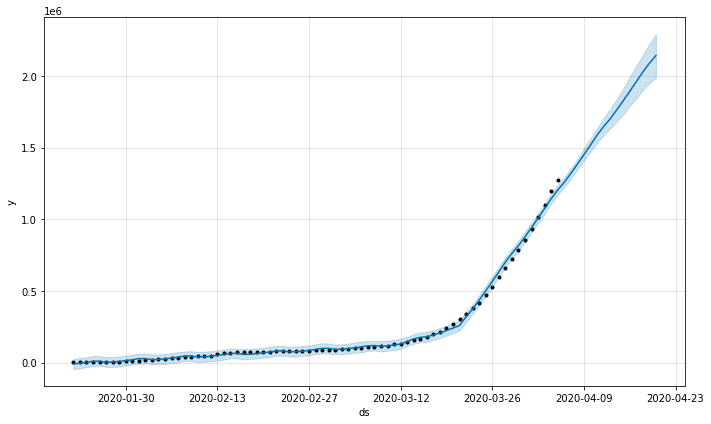

In [72]:
confirmed_forecast_plot = y.plot(forecast)

Forecast Graph of Confrimed cases

In [0]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [75]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=15)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
85,2020-04-16
86,2020-04-17
87,2020-04-18
88,2020-04-19
89,2020-04-20


In [76]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
85,2020-04-16,101206.539650,96045.095170,106795.632851
86,2020-04-17,105017.356571,98801.608363,111439.935790
87,2020-04-18,108866.264132,102695.542568,115894.343784
88,2020-04-19,112306.580894,104630.298872,120304.869025
89,2020-04-20,115034.217829,106828.221236,123397.172252


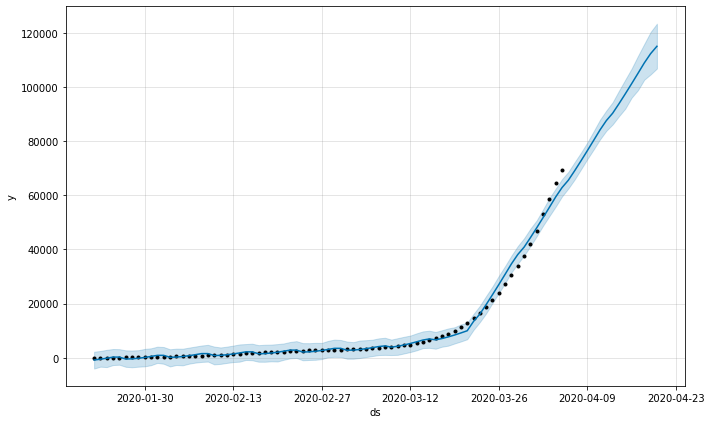

In [77]:
deaths_forecast_plot = m.plot(forecast)

In [0]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [80]:
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=15)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
85,2020-04-16
86,2020-04-17
87,2020-04-18
88,2020-04-19
89,2020-04-20


In [84]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
85,2020-04-16,339235.551296,322385.629948,357416.273836
86,2020-04-17,349258.603797,331068.246531,371303.289560
87,2020-04-18,360164.019803,341020.182004,383357.909454
88,2020-04-19,369872.612477,349565.530332,394331.576068
89,2020-04-20,376845.032576,353374.366400,404492.335907


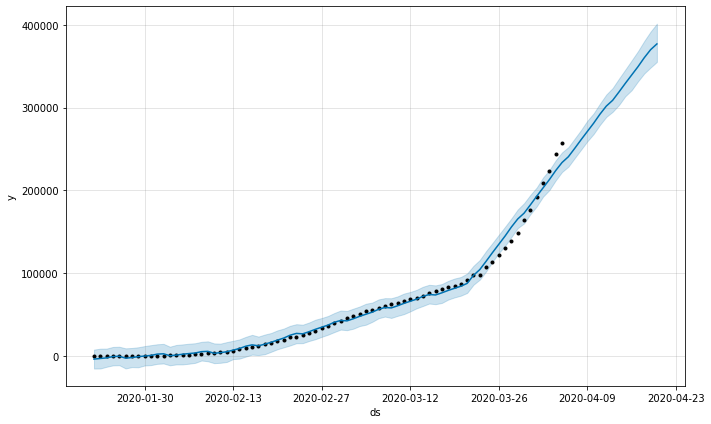

In [82]:
recovered_forecast_plot = m.plot(forecast)